In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

# K-means on MNIST

In [2]:
# Input is the data x and no. of centers k
# Output centroid for all the centers and index of cluster for each of the data
def k_means(x, k=3, max_iter=10, init_method='random', return_init_centroid_index = False):
    n, p = x.shape
    c = np.zeros(n)

    # Initialize centroids mu
    if init_method == 'farthest':
        print('Initializing centroid for k-means with farthest method.')
        mu = np.zeros((k, p))
        init_indices = []
        mu[0, :] = x[np.random.choice(n, 1), :].reshape(-1)
        for k_idx in range(1, k):
            dists = None
            for l_idx in range(k_idx):
                temp = np.linalg.norm(x - mu[l_idx, :].reshape(-1), axis=1).reshape(-1)
                if dists is not None:
                    dists = dists + temp
                else:
                    dists = temp

            max_idx = np.argmax(dists)
            init_indices.append(max_idx)
            mu[k_idx, :] = x[max_idx, :]
        print('Initialized.')
    else:
        init_indices = np.random.choice(n, k)
        mu = x[init_indices, :]

    # Iterate for some max-iterations
    for iter_idx in tqdm(range(max_iter)):

        # Update the cluster of all the points based on the closeness
        for x_idx in range(n):
            dists = np.linalg.norm(mu - x[x_idx, :].reshape(-1), axis=1)
            c[x_idx] = np.argmin(dists)

        # Update the centroids as the average of all the points within their clusters
        for mu_idx in range(k):
            mu[mu_idx, :] = np.average(x[(c == mu_idx), :], axis=0)

    if return_init_centroid_index:
        return mu, c, init_indices
    else:
        return mu, c


In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

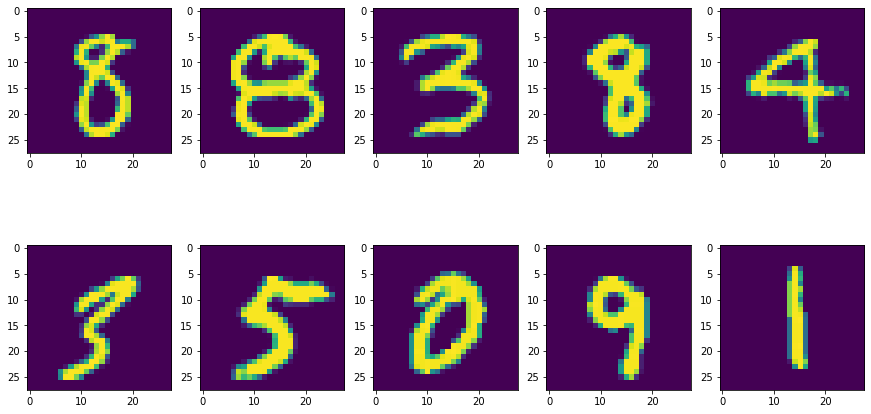

In [4]:
plt.figure(figsize=(15, 8))
for sp_idx, idx in enumerate(np.random.choice(len(X_train), 10, replace=False)):
    plt.subplot(2, 5, sp_idx+1)
    plt.imshow(X_train[idx, :, :].reshape(28, 28))
plt.show()

In [7]:
X = X_train.reshape(-1, 28*28)

In [6]:
def find_cluster_label_dict(c_indices, labels):
    cluster_label_dict = {}
    for c_idx in np.unique(c_indices):
        temp = (labels[c_indices == c_idx])
        temp = temp.astype('int')
        temp = np.bincount(temp)
        cluster_label_dict[c_idx] = np.argmax(temp)
    return cluster_label_dict


def find_cluster_labels(c_indices, labels):
    c_indices = c_indices.astype('int')
    cluster_label_dict = find_cluster_label_dict(c_indices, labels)
    label_pred = []
    for c_idx in c_indices:
        label_pred.append(cluster_label_dict[c_idx])
    return label_pred

In [8]:
k_range = [10, 15, 20, 30, 40, 50]
scores = []

In [9]:
for k in tqdm(k_range):
    n_trials = 3
    c_arr = np.zeros((n_trials, len(X)))
    for trial_idx in tqdm(range(n_trials)):
        mu, c = k_means(X, k, max_iter=10, init_method = 'farthest')

        cluster_label_dict = find_cluster_labels(c, y_train)
        for c_idx in cluster_label_dict.keys():
            c[c==c_idx] = cluster_label_dict[c_idx]

        c_arr[trial_idx, :] = c.reshape(-1)
    
    y_pred = []
    for row in c_arr.T:
        temp = np.bincount(row.astype('int'))
        y_pred.append(np.argmax(temp))
    
    scores.append(accuracy_score(y_train, y_pred))

Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 3, 2: 0, 3: 7, 4: 2, 5: 0, 6: 6, 7: 8, 8: 4, 9: 0}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 0, 2: 6, 3: 4, 4: 1, 5: 7, 6: 2, 7: 0, 8: 8, 9: 3}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 0, 2: 4, 3: 5, 4: 6, 5: 3, 6: 0, 7: 2, 8: 7, 9: 8}



Initializing centroid for k-means with farthest method.
Initialized.



{0: 7, 1: 8, 2: 0, 3: 6, 4: 6, 5: 3, 6: 9, 7: 0, 8: 1, 9: 2, 10: 4, 11: 5, 12: 0, 13: 6, 14: 3}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 8, 1: 4, 2: 3, 3: 0, 4: 6, 5: 9, 6: 0, 7: 0, 8: 2, 9: 7, 10: 6, 11: 0, 12: 7, 13: 6, 14: 1}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 5, 1: 8, 2: 9, 3: 6, 4: 0, 5: 7, 6: 2, 7: 4, 8: 1, 9: 6, 10: 0, 11: 0, 12: 3, 13: 6, 14: 0}



Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 4, 2: 1, 3: 0, 4: 2, 5: 7, 6: 8, 7: 5, 8: 6, 9: 9, 10: 8, 11: 0, 12: 3, 13: 7, 14: 0, 15: 6, 16: 6, 17: 9, 18: 3, 19: 0}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 0, 2: 8, 3: 2, 4: 8, 5: 4, 6: 2, 7: 0, 8: 7, 9: 6, 10: 1, 11: 3, 12: 6, 13: 5, 14: 9, 15: 0, 16: 2, 17: 4, 18: 3, 19: 0}
Initializing centroid for k-means with farthest method.
Initialized.



{0: 1, 1: 4, 2: 0, 3: 6, 4: 9, 5: 0, 6: 8, 7: 3, 8: 2, 9: 7, 10: 6, 11: 0, 12: 4, 13: 3, 14: 0, 15: 1, 16: 7, 17: 6, 18: 8, 19: 0}



Initializing centroid for k-means with farthest method.
Initialized.


/Users/girish/EverythingElse/code_repos/synthetic-data/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/girish/EverythingElse/code_repos/synthetic-data/venv/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



{1: 1}
Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}
Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}



Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}
Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}
Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}



Initializing centroid for k-means with farthest method.
Initialized.



{1: 1}
Initializing centroid for k-means with farthest method.




KeyboardInterrupt: 

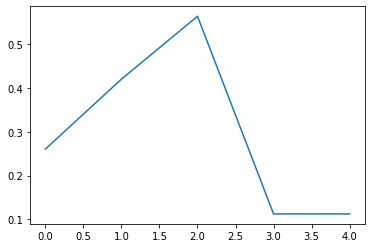

In [22]:
plt.plot(scores)